### Decision Tree
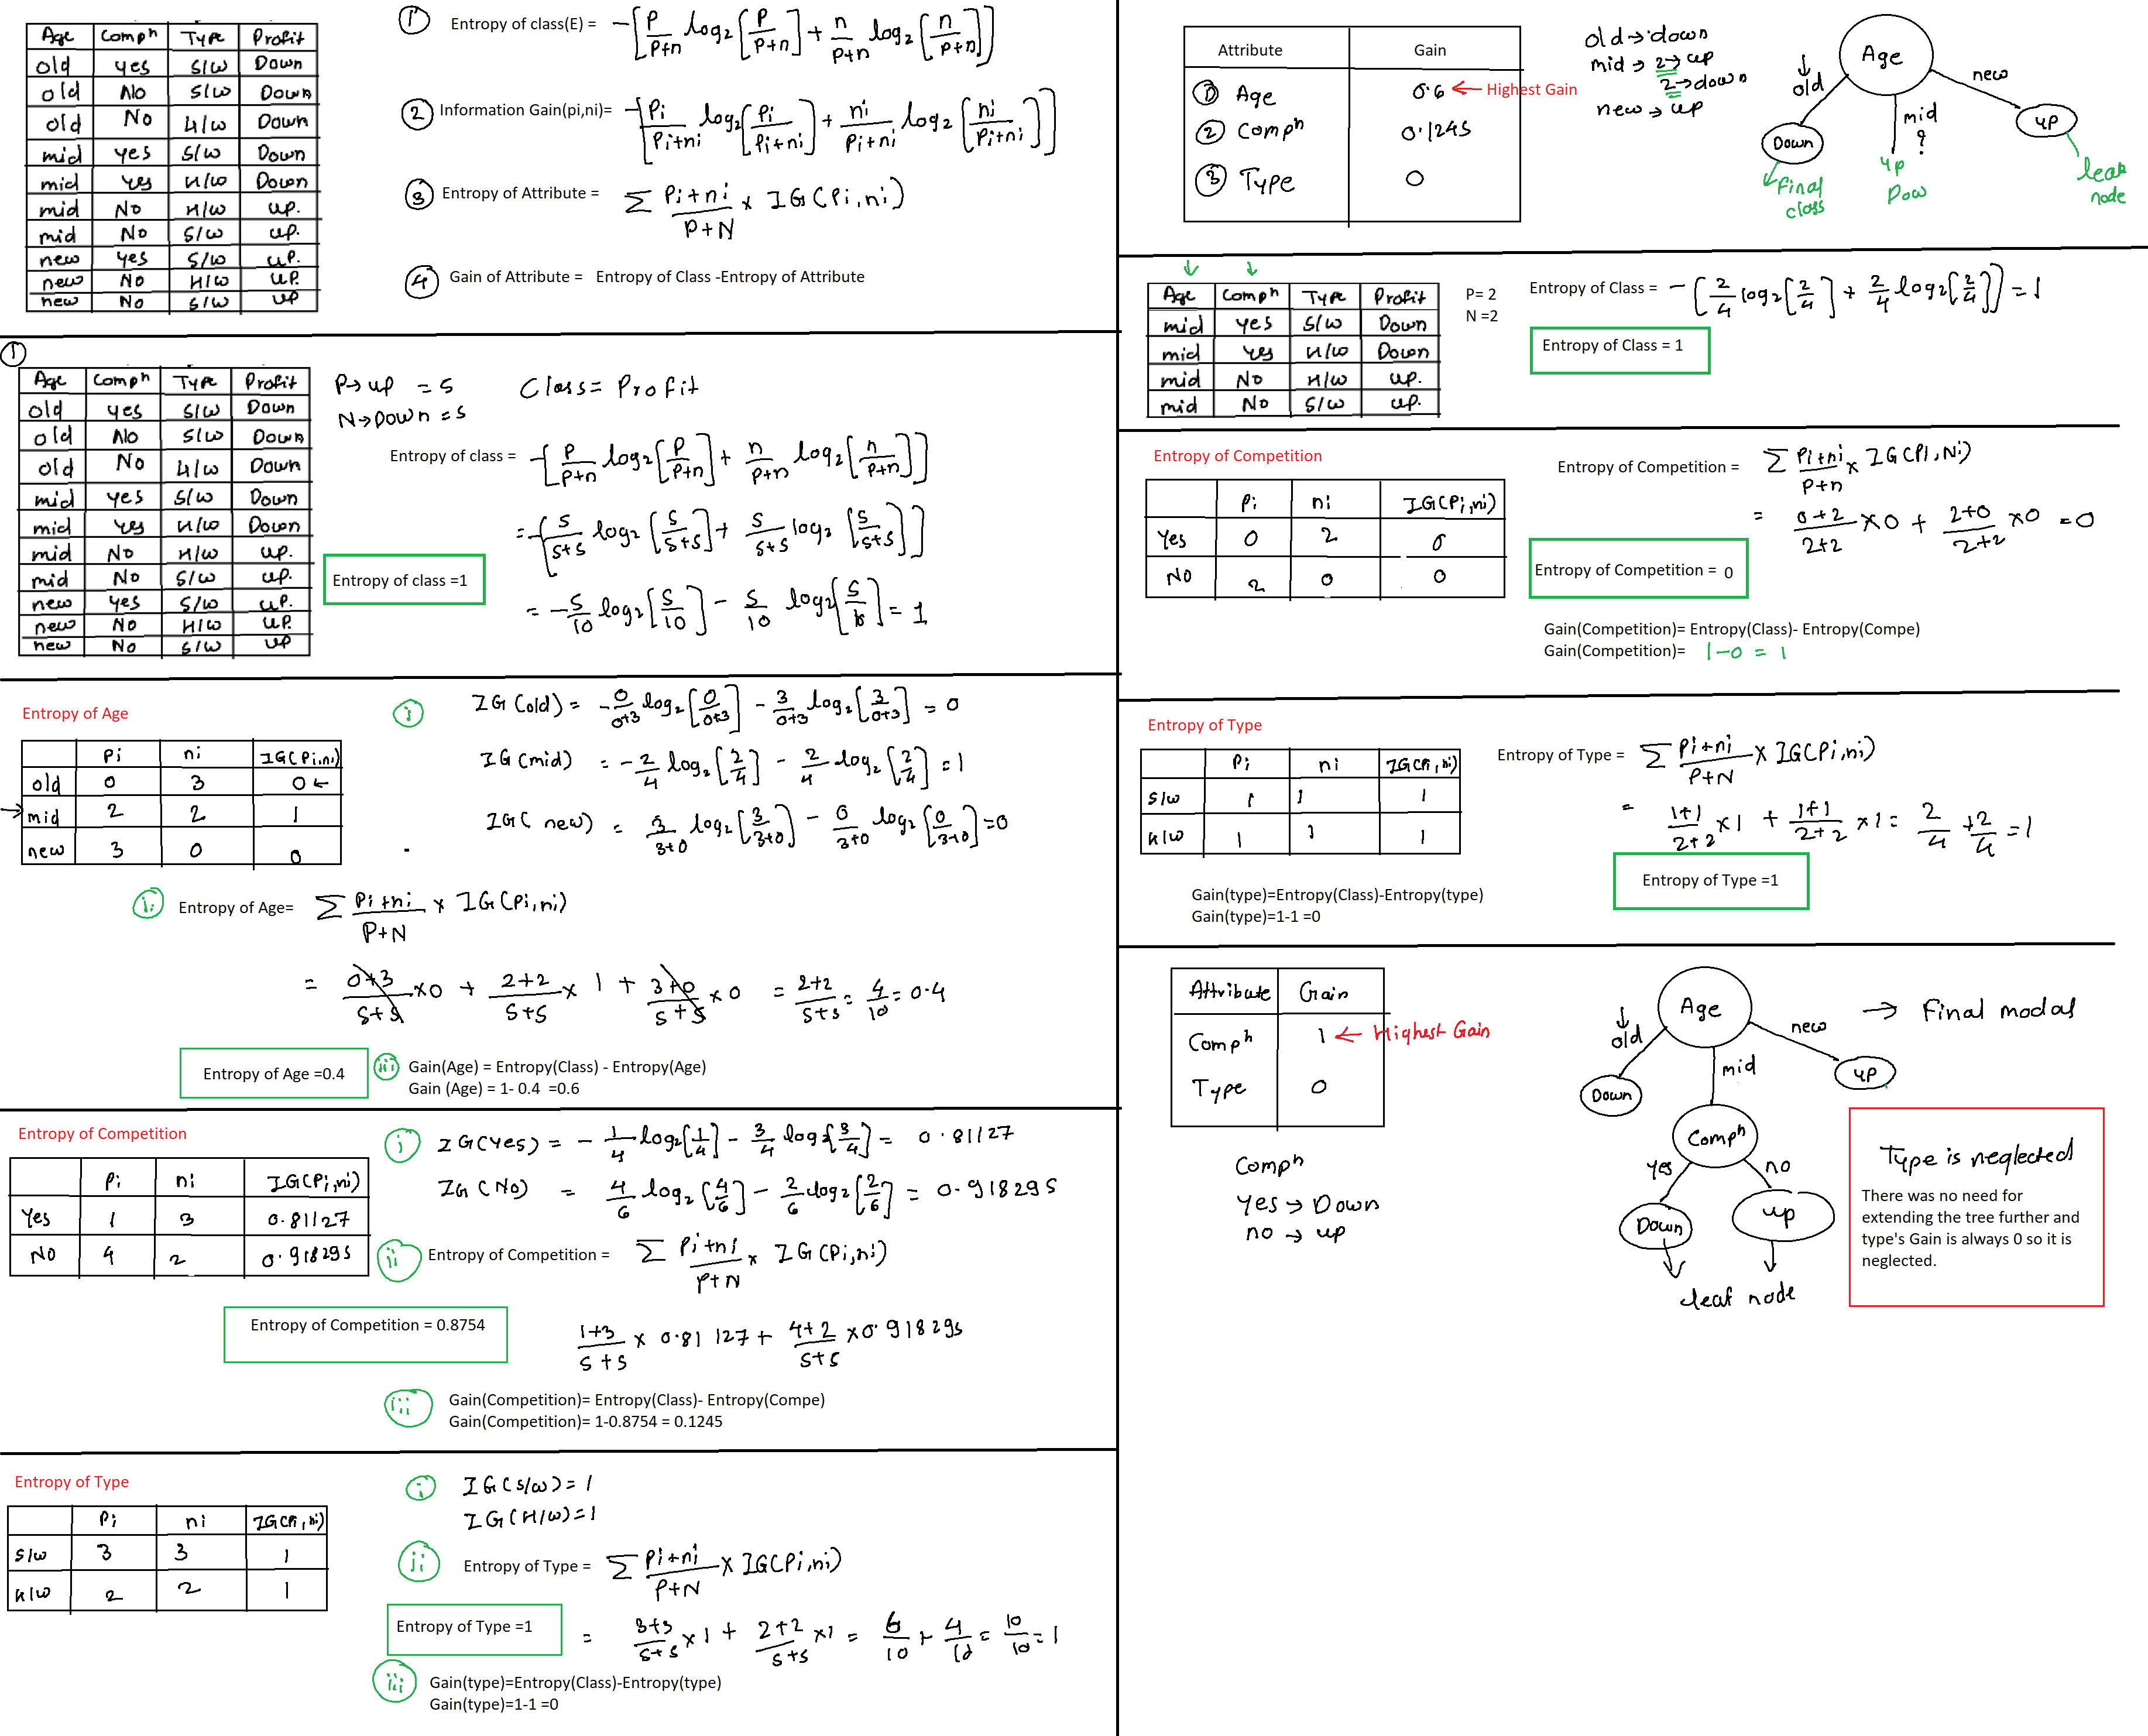

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("../Data/diabetes.csv")

In [ ]:
df.head()

In [ ]:
x=df.drop(columns="Outcome")
y=df["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)

In [ ]:
ypred=model.predict(xtest)
ypred

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

### Tuning Hyparameters 

In [22]:
#model
model=DecisionTreeClassifier()
criterion =["gini", "entropy"]
splitter =["best", "random"]
max_features = ["auto", "sqrt", "log2"]
max_depth=range(1,11)
#parameters
grid=dict(criterion=criterion,splitter=splitter,max_depth=max_depth,max_features=max_features)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
#Grid Search CV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'splitter': 'best'}
0.7243081262118807


### Retraining the model

Accuracy is : 0.8051948051948052
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



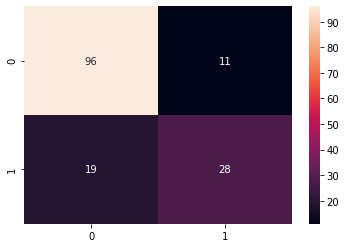

In [34]:
model=DecisionTreeClassifier(criterion='entropy', max_depth= 4, splitter= 'best',max_features='log2')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
#Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

In [33]:
help(model)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choo

<a href="https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680">Link for Hyperparameter Details</a>